# Regressione lineare (parte 1 - max 1.5 punti)
Nella carriera di un ingegnere matematico la regressione lineare è uno strumento di straordinaria importanza, ma è veramente necessario vederla in 10 corsi diversi? E ogni volta dall'inizio?

Se non ne puoi più, salta questo assignment. 

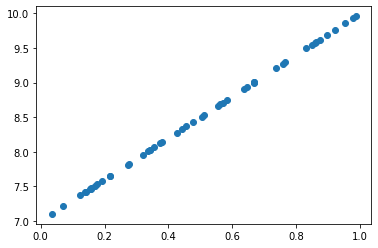

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Generazione dei dati 
n = 50                 # numero di punti analizzati
X = np.random.rand(n)

true_beta = [7, 3]     # [intercetta, coef. angolare]

y_true = true_beta[0] + true_beta[1] * X

plt.scatter(X, y_true)
plt.show()

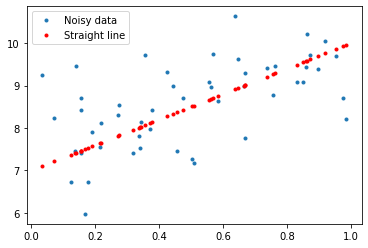

In [ ]:
y = y_true + np.random.randn(n)     # aggiungo un errore gaussiano standard
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.legend()
plt.show()

### Regressione lineare via least squares estimation

Considera come riferimento https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods

Calcola i parametri $\beta$ della regressione e plotta il risultato ottenuto

$\hat{\beta} = (X^T X)^{-1} X^T Y$

In [ ]:
beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(np.reshape(X,(X.size,1)),np.reshape(X,(1,X.size)))),X.transpose()),y)

### Regressione lineare via sklearn

Trova in sklearn ciò che fa al caso nostro e plotta il risultato ottenuto

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
dir(lin_reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

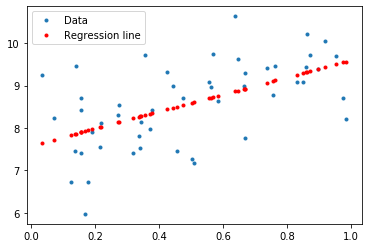

In [ ]:
lin_reg.fit(np.reshape(X,(X.size,1)),y)
coeff = lin_reg.coef_
intercept = lin_reg.intercept_
y_pred = coeff*X + intercept;
plt.plot(X, y, '.', label = "Data")
plt.plot(X, y_pred, 'r.', label = "Regression line")
plt.legend()
plt.show()

### Regressione con batch gradient descent

Implementa la regressione tramite batch gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [ ]:
# Gradient Descent

def Batch_Gradient_Descent(X,y,alfa=0.01,dim=2,Iterations=1000):
    
    w = np.random.randn(dim,1)  # inizializzazione del vettore dei pesi
    N=y.size
    it = 0;   # initialize iterations

    while it<Iterations:
        y_curr = w[1]*X + w[0]
        Grad_1 = -2 * X.T.dot(y - y_curr)/N
        Grad_0 = -2 * np.sum(y - y_curr)/N
        w[1] = w[1]-alfa*Grad_1
        w[0] = w[0]-alfa*Grad_0
        it+=1
        
    return w
    


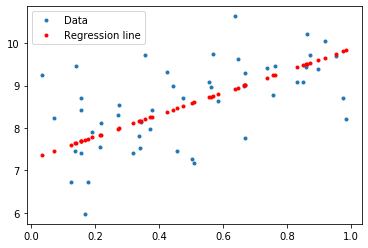

In [ ]:
alfa =0.01  # Learning rate
dim = 2
Iterations = 1000

w = Batch_Gradient_Descent(X,y,alfa,dim,Iterations)

# Plot        
y_pred_Batch = w[1]*X +w[0];
plt.plot(X, y, '.', label = "Data")
plt.plot(X, y_pred_Batch, 'r.', label = "Regression line")
plt.legend()
plt.show()

In [ ]:
# Mini Batch Graadient Descent

def Mini_Batch_Gradient_Descent(X,y,alfa,n_batch,dim,Iterations): 

    batch_size = int(y.size/n_batch)
    w = np.reshape(np.array([7,3]),(dim,1))+np.random.randn(dim,1)  # inizializzazione del vettore dei pesi
    N=y.size
    it = 0
    
    while it<Iterations:
        indices = np.random.permutation(N)
        X_new = X[indices]
        y_new = y[indices]
        it+=1
        for i in range(0,N,batch_size):
            y_i = y_new[i:i+batch_size]       
            X_i = X_new[i:i+batch_size]
            y_curr_i = w[1]*X_i + w[0]
            Grad_1_i = -2 * X_i.T.dot(y_i - y_curr_i)/N
            Grad_0_i = -2 * np.sum(y_i - y_curr_i)/N
            w[1] = w[1]-alfa*Grad_1_i
            w[0] = w[0]-alfa*Grad_0_i
            
    return w


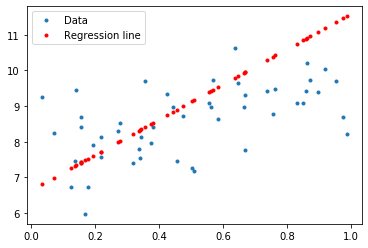

In [ ]:
alfa = 0.01  # Learning rate
dim = 2
n_batch = 10 #number of batches
Iterations = 30

w = Mini_Batch_Gradient_Descent(X,y,alfa,n_batch,dim,Iterations)

#Plot
y_pred_mini_batch = w[1]*X +w[0];
plt.plot(X, y, '.', label = "Data")
plt.plot(X, y_pred_mini_batch, 'r.', label = "Regression line")
plt.legend()
plt.show()

### Regressione con stochastic gradient descent

Implementa la regressione tramite stochastic gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [ ]:
# Stochastic Gradient Descent

def Stochastic_Gradient_Descend (X,y,alfa,dim,Iterations):
    
    w = np.random.randn(dim,1)  # initialize coefficients
    N=y.size
    it = 0;   # initialize iterations

    while it<Iterations:
        idx = np.random.randint(0,N)
        X_i = X[idx]
        y_i = y[idx]
        y_curr_i = w[1]*X_i + w[0]
        Grad_1 = -2 * X_i*(y_i - y_curr_i)/N
        Grad_0 = -2 * np.sum(y_i - y_curr_i)/N
        w[1] = w[1]-alfa*Grad_1
        w[0] = w[0]-alfa*Grad_0
        it+=1
        
    return w
    


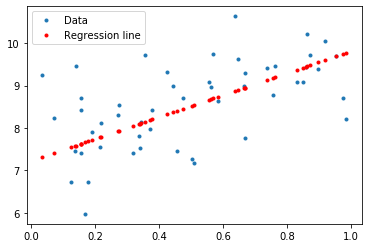

In [ ]:
alfa =0.01  # Learning rate
dim = 2
Iterations = 10000

w = Stochastic_Gradient_Descend (X,y,alfa,dim,Iterations)

# Plot        
y_pred_stoch = w[1]*X +w[0];
plt.plot(X, y, '.', label = "Data")
plt.plot(X, y_pred_stoch, 'r.', label = "Regression line")
plt.legend()
plt.show()

# Regressione lineare (parte 2 - max 1.5 punti)


Implementa una classe MyLinearRegression che abbia i seguenti metodi:
    - fit(X,y)
    - predict(X_test)
    - show_info
    
Un primissimo scheletro è proposto qui, ma è consigliabile (per maggiore chiarezza) aggiungere ulteriori metodi all'interno della classe.

In [1]:
import time

In [2]:
class MyLinearRegression:
    
    time = time.time()

    def fit(self, X, y):
        lin_reg.fit(X,y)
        self.coeff = lin_reg.coef_
        self.intercept = lin_reg.intercept_
        
        # Indices
        N = X.shape[0]
        p = X.shape[1]
        y_mean = np.mean(y)
        y_pred = np.dot(X,self.coeff)+self.intercept
        
        SSres = np.sum((y-y_pred)*(y-y_pred))
        SStot = np.sum((y-y_mean)*(y-y_mean))
        
        self.rsq = 1-SSres/SStot
        self.adjrsq = 1-(1-self.rsq)*(N-1)/(N-p-1)
        self.loss = np.sum((y-y_pred)*(y-y_pred))/N
        
    def predict(self, X_test):
        y_pred = self.coeff*X + self.intercept;
        return y_pred
    
    def show_info(self):
        print("Loss = ", self.loss)
        print("R squared = ", self.rsq, "\nAdjusted R squared = ", self.adjrsq)
        self.time = time.time()-self.time
        print("Elapsed Time = ", self.time)

In [6]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target']

model = MyLinearRegression()
model.fit(X, y)
model.show_info()

Loss =  2859.6903987680657
R squared =  0.5177494254132934 
Adjusted R squared =  0.506560316954205
Elapsed Time =  31.983615159988403
